In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### <u>Import dataset from file</u>
<p>The dataset we will use contains data of sales from electronics store for 12 months. It store hundreds of thousands of detailed purchases information frome the stores. The data is broken down by month, product type, cost, purchase address, etc.</p>
<p> We will use pandas read_csv() to obtain csv file from our directory. Here's my data saved in a folder rooted in my D drive, then I use read_csv() and saved the output inside a variable as a dataframe. After that, we have to analyze the overview of the data. I used shape to find out about the rows and columns of the dataframe. Then, I printed the variable to show several data of the dataframe. </p>

In [2]:
df = pd.read_csv('D:\Documents\!USAHA\!Porto4\SalesAnalysis_data.csv')

In [3]:
df.shape

(186850, 6)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### <u>Preparing data</u>
<p>The data set we have contains empty rows and other unnecessary data. That's why data cleaning is needed for facilitate later analysis. <br> We will count the null values in every column  using .isnull() and sumarize the total null founded. It shows the total null values existed in every column are 545.
    <br> Next, we use .any() with parameter axis=1, so the shown data will show all null value that existed in any cell of each row(index). This command shows there are 545 rows that contain atleast one null value in each row. So, we will check if the rows here would have null values in their entire columns, by changing .any() to .all(). The result is, appearently all the 545 rows we found earlier contained null values in every columns.

In [5]:
#count null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#view data with null values
#df[df.isnull().any(axis=1)]
df[df.isnull().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


<p> I also noticed that the data has several values in its cells which have header name as its values. So, I will go through the data that contain value of header name. I pick the 'Order ID' columns, which is supposed to show number instead of string/object. Here we found 355 rows that contain header name as its value and we don't need these data for the analysis.</p>

In [7]:
#drop unused row
df.loc[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<p> From the previous anlysis, we know that there are rows that need to be dropped. Because we know the condition of those data, we can apply it on drop command. <br> Then, we check the data shape to know the change occurred. Now, we have data that contains 185950 rows and 6 columns.

In [8]:
#drop null rows and unwanted rows
df.dropna(how='all', inplace=True)
df.drop(df[df['Order ID'].str.contains('Order ID')].index, inplace=True)
df.shape

(185950, 6)

<p>The columns of the dataframe need to transformed into certain datatype for simplify analysis process. The columns are 'Quantity Ordered', 'Price Each', and 'Order Date' which need to change into numeric and date type. </p>

In [9]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
#parse datatype
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

### 1. How much sales has been made for each month?

<p> Before analize the data, we need to add a new column for the order month taken from the month part of the 'Order Date' column values. But first, make sure that there's no column with similar name as the new column's name by using drop function. The drop function need to consist of errors='ignore' syntax to handle error if the column with a similar name was not found.
    Then, we use .dt.month on the 'Order Date' column so we can get the month number and save it to the new column, 'Order Month'.
    After that, I moved the new column to the right side of the 'Order Month' column with .insert(). Inside the parenthesess, for the first argument, we put the index location we will use for the 'Order Month' column, second argument is for the column name, third argument is .pop() syntax which will get the 'Order Month' column from the current dataframe. </p>

In [11]:
#drop if exists
df.drop('Order Month', axis=1, errors='ignore')
#add month column
df['Order Month'] = df['Order Date'].dt.month
#rearrange columns
df.insert(5, 'Order Month', df.pop('Order Month'))

<p> Here, we add a new column for sales calculation and save the result in a dataframe for the visualization.<p>

In [12]:
#add sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

<p> Then, after everything what we need is there, we can group the data by the values of 'Order Month' and sum up the value of 'Sales' column to see the total sales of each month.
    We will save the output as the dataframe for the visualization.</p>

In [13]:
#What was the best month for sales
#df['Order Date'].dt.year.value_counts()
output = pd.DataFrame(df.groupby(df['Order Month'])['Sales'].sum(), index=None).reset_index()
output

,Order Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


<p> From the result of previous line, the information that can be acquired from this analysis, is the most sales of product from electronic store happened in 12th month, which is December. It shows the total sales obtained is over 4.5 million USD. For better delivery to stakeholders, we need to use visualization for the result. We will use matplotlib to make the visualization. Below, is the code for transforming the data in dataframe into bar chart. We need value of 'Order Month' and 'Sales' to make the chart. We can also put the information that could help anyone to understand the chart. Here, we add the title, and the label for both x and y coordinate line. </p> 

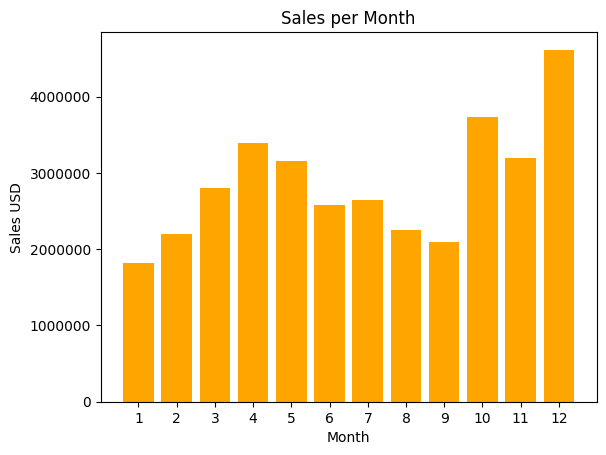

In [14]:
plt.bar(output['Order Month'].unique(), output['Sales'], color='orange')
plt.xticks(output['Order Month'])
plt.xlabel('Month')
plt.ylabel('Sales USD')
plt.ticklabel_format(style='plain')
plt.title('Sales per Month')
plt.show()

<p><strong>Here, we can see the whole information, we can see, that, beside the largest sales that happened in December, there also the least sales of electronic store that happened in the first month which is January with total sales under 200 million USD. This bar chart can help us to understanding the data better instead using the tabular form. </strong></p>   

***

### 2. Highest number of sales per city?

<p> For this question, we want to see total sales for each city. <br> We need to add a new columnn to save city information of the orders. We will take it from the 'Purchase Address' because it contains the detail address, city's name and city's code. The value of the 'Purchase Address' must be split using .split() and add a comma as the argument because we will divide the word of the value every time we meet comma in the value. The comma acts as seperator for the value. We also need to put down the position of the word from the value that we will divide using index in a square brackets. We are using apply and lambda to apply this chain of expressions for every value existed in the 'Purchase Address' column.
</p>

In [15]:
#drop column if exist and add 'City' column
df.drop(columns='City', inplace=True, errors='ignore')
df.insert(7, 'City', df['Purchase Address'].apply(lambda x:x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]) +')')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Purchase Address,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99


<p>Then, we will analyze the total sales per city. We can see this result by grouping the data by its city, which column we made earlier. We also sum the sales data and sort it base ont the total sales, so we can see the largest amount of sales per city. 
    We will save our analysis data using 'output' dataframe for the visualization.</p>

In [16]:
#save data that grouped by City and get the total sales
output = pd.DataFrame(df.groupby('City').sum().sort_values('Sales', ascending=False))
output.head()

,Quantity Ordered,Price Each,Order Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58


<p> We can see the goal of the anlysis for the second question has been answered by seeing the table above. But, for better understanding we will show the data in chart form. The code for transforming the table is below. We use data from the 'City' and 'Sales' column as the dimension for visualization.</p>

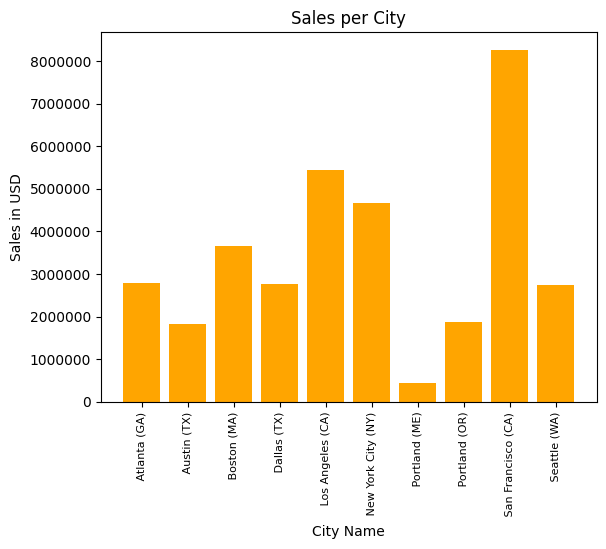

In [17]:
cities_label = [city for city, d in df.groupby('City')]
plt.bar(cities_label, df.groupby('City')['Sales'].sum(), color='orange')
#plt.bar(output['City'], output['Sales'])
plt.xlabel('City Name')
plt.ylabel('Sales in USD')
plt.xticks(rotation='vertical', size=8)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Sales per City')
plt.show()

</p> <strong>The conclusion that can be acquired from this anlysis, is the most sales of product from electronic sales happened in San Francisco city and obtained over 8 million USD followed by Los Angels city with total sales almost 6 million USD. The visualization also state that the least sales happened in Portland with sales under one million USD. </strong></p>

***

### 3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

<p> For answer this question, we need time information of the orders. The time information can be fetched from the 'Order Date' column. We will add a new column for the hour and minute of the order time which is taken from time part of the 'Order Date' column values. After that, we will group the data based on the order hour to count total order then, we save it in our output dataframe to simplify the visualization. </p>

In [18]:
df.drop(columns=['Hour','Minute'], inplace=True, errors='ignore')
df.insert(6, 'Hour', df['Order Date'].dt.hour)
df.insert(7, 'Minute', df['Order Date'].dt.minute)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Hour,Minute,Purchase Address,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,8,46,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,22,30,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99


<p> After we have the hour data, we can grouped data by that column and count the row of column 'Order ID'. The result will be transformed into dataframe and saved in 'output' variable.</p>

In [19]:
output = pd.DataFrame(df.groupby('Hour')['Order ID'].count()).reset_index()
output

,Hour,Order ID
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


<p> The visualization is made using line chart that specify the hour and number of order at that hour. To state the encounter point, using dot symbol as a mark is really helpful.</p>

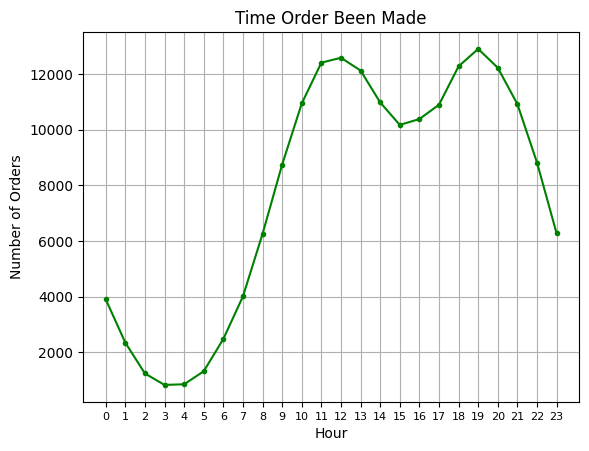

In [20]:
plt.plot(output['Hour'], output['Order ID'], marker='.', color='green')
plt.xticks(output['Hour'], size=8)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Time Order Been Made')

plt.grid()
plt.show()

<p><strong> From the data, we can conclude that the most orders was occurred arround 7 o'clock in the evening, with number of orders of 12905, followed by data of 12 o'clock, with number of orders of 12587, which is actually not much different with number of orders at around 7 o'clock. And for the least orders was occurred around three and four o'clock in the morning. So if we need to suggest the perfect time for placing advertisement, we could suggest 7 around 7 o'clock or 12 o'clock.</strong></p>

***

### 4. What products are most often sold together?

<p>For this step, we will find what product are often bought together by the customers. So, we can analyze it by looking at data of different product names with same 'Order ID' value. We can use .duplicated() on 'Order ID' to show duplicate data and use 'keep=False' so it returns all the duplicated data and the duplicates.</p>

In [21]:
df_items = df[df['Order ID'].duplicated(keep=False)]
df_items.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Hour,Minute,Purchase Address,City,Sales
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.0


<p>Next, we will use .transform() to join the name of products that have same 'Order ID' value and seperated the word with comma, so we won't get confused with the combined products' name. To make this join happen, we have to group the data by its 'Order ID' values first. Then the combined products' name will be saved in a new column called 'Grouped Items' and placed after the last column of current dataframe, which we get from count the length of column of the dataframe's column using len(). We will add all this information in .insert() function, so the column can be generated. Because at this time, I only need the two columns, I'll overwrite the dataframe to save only two necessary columns, which are 'Order ID' and 'Grouped Items' column. Then, we could drop the duplicates by the 'Order ID' because the 'Grouped Items' column already has the joined value of the products' name.</p>

In [22]:
df_items.insert(len(df_items.columns), 'Grouped Items', df_items.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)))
df_items=df_items[['Order ID', 'Grouped Items']].copy()

In [23]:
df_test = df_items[['Order ID', 'Grouped Items']].drop_duplicates()
#df_test2 = df_items2.drop_duplicates()

<p>Below, is the result of the logic, we can see the 'Grouped Items' column has all products name of one order id. We also can do a recheck to make sure that all the 'Order ID' is unique and no duplicate by using the code below. We group the data using order id and count the data of the group and create the condition. The condition that must be met is the count of each row shown can't be more than one. We can sum all the countings and expect the result to be zero, because if it was not zero, there must be a true condition of the logic, the order id must be duplicated or else.</p>

In [24]:
sum(df_test.groupby('Order ID')['Order ID'].count() > 1)

0

<p>Now, we will make a counter to count the combination of products. Then, get every row of 'Grouped Items' column, split the value as items inside a list, and use .combination() to return the possible combination. The .Counter() in the looping will give a count for every combination and the count.update() will update the count for every list of combination that the .Counter() gave. Last, line will show the most purchased combination of products.
</p>

In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_test['Grouped Items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

<p><strong>From the result above, combination of product that frequently bought together are iPhone and Lightning Cable. This combination of products was ordered for over a thousand times. It followed by combination of Google Phone and USB-C Charging Cable which occurred for almost a thousand times.</strong></p>

***

### 5. What product sold the most?

<p> Here we want to see which product is sold the most. For that goal, we can grouped the data by the product name from 'Product' column and sum the ordered quantity from 'Quantity Ordered' column for every order. We will need sorting to see the most sold product and save the output as a dataframe in output variable. </p>

In [26]:
output = pd.DataFrame(df.groupby(['Product', 'Price Each'])['Quantity Ordered'].sum().sort_values(ascending=False)).reset_index()
output.head()

,Product,Price Each,Quantity Ordered
0,AAA Batteries (4-pack),2.99,31017
1,AA Batteries (4-pack),3.84,27635
2,USB-C Charging Cable,11.95,23975
3,Lightning Charging Cable,14.95,23217
4,Wired Headphones,11.99,20557


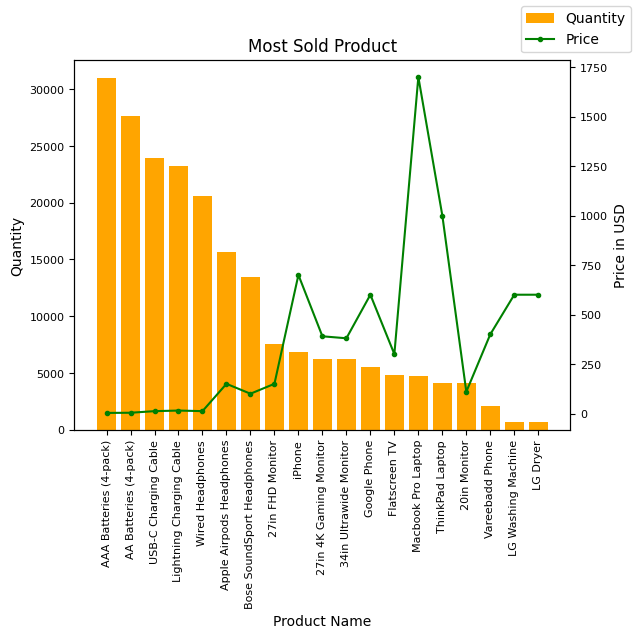

In [187]:
#plt.bar(output['Product'], output['Quantity Ordered'])
#plt.xlabel('Product Name')
#plt.ylabel('Quantity')
#plt.xticks(rotation='vertical', size=8)
#plt.title('Total Sold Product')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(output['Product'], output['Quantity Ordered'], color='orange')
ax2.plot(output['Product'], output['Price Each'], color='green', marker='.')

ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price in USD')

ax2.grid(False)
ax1.set_xlabel('Product Name')
ax1.tick_params(axis='x', labelrotation=90, labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

fig.legend(labels=['Quantity','Price'])
plt.title("Most Sold Product")
#df.groupby(['Product', 'Price Each'])['Price Each'].sum().sort_values(ascending=False).plot(kind='line', color='blue')
#df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar', ylabel='Product Name', xlabel='Quantity', fontsize=8, title='Total Sold Product', color='orange')

plt.show()

<p> <strong>From the chart, we can obtain the information that the most sold product of electronic store is AAA Batteries (4-pack) which sold for over three thousand units and the least product sold is LG Dryer which sold below a thousand units. If we see the line chart of price, we can assume that one of the reasons why the most sold product attracts customers is because its price is affordable. </strong> </p>